## Multi-Label Chest X-Ray Pathology Detection of COVID-19 with Transfer Learning
Colm Clancy : 01365631 

## ROC for entire dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import pandas as pd

In C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\colmc\Anaconda3\envs\new_env

In [48]:
#validate = pd.read_csv('E:/validate.csv')
validate = pd.read_csv('E:/test_df.csv')
#results = pd.read_csv('E:/predicted_train_weight_test.csv')
#results = pd.read_csv('E:/predicted_vgg_25.csv')
#predicted_D121_50
results = pd.read_csv('E:/model1/model2.csv')
results1 = pd.read_csv('E:/model1/model1.csv')
results2 = pd.read_csv('E:/model1/model2.csv')

C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
#results['1']
#train['COVID19']
res = results.loc[:,'0':'196'].values
res1 = results1.loc[:,'0':'196'].values
res2 = results2.loc[:,'0':'196'].values
val = validate.loc[:,'COPD signs':'differential diagnosis'].values

In [50]:
res1 = results1.loc[:,'0':'196'].values
val = validate.loc[:,'COPD signs':'differential diagnosis'].values
roc_auc_score(val,res1, average='micro')

0.8201753753236765

In [51]:
res2 = results2.loc[:,'0':'196'].values
val = validate.loc[:,'COPD signs':'differential diagnosis'].values
roc_auc_score(val,res2, average='micro')

0.8098974056014758

In [52]:
import pandas as pd# Compute ROC curve and ROC area for each class
n_classes = 197
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val[:, i], res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val.ravel(), res.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


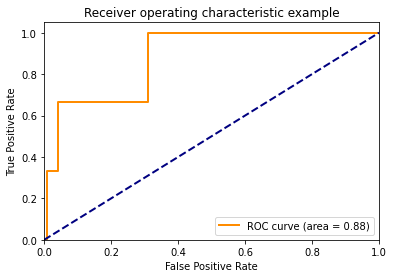

In [53]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ROC for COPS signs

In [54]:
#res_covid = results['1'].values
#val_covid = validate['COVID19'].values

res_COPD = results['0'].values
val_COPD = validate['COPD signs'].values
res_COPD.shape = [10158 ,1]
val_COPD.shape = [10158 ,1]

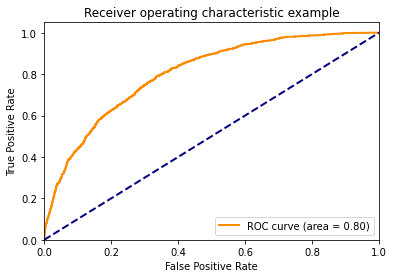

In [55]:
import pandas as pd# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_COPD[:, 0], res_COPD[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_COPD.ravel(), res_COPD.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ROC for COVID-19

In [56]:
#res_covid = results['1'].values
#val_covid = validate['COVID19'].values

res_covid = results['1'].values
val_covid = validate['COVID19'].values
res_covid.shape = [10158 ,1]
val_covid.shape = [10158 ,1]

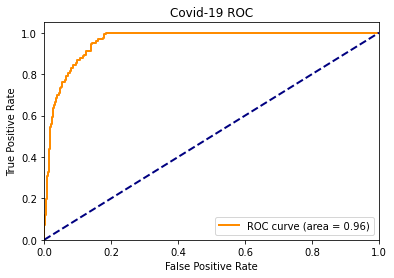

In [57]:
import pandas as pd# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_covid[:, 0], res_covid[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_covid.ravel(), res_covid.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Covid-19 ROC')
plt.legend(loc="lower right")
plt.show()

#### Confusion matrix with treshold

In [58]:
predict_mine = np.where(res_covid[:, 0] > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix
confusion_matrix(val_covid[:, 0], predict_mine)

array([[9104,  931],
       [  19,  104]], dtype=int64)

### consolidation

In [59]:
#res_covid = results['1'].values
#val_covid = validate['COVID19'].values

res_consol = results['56'].values
val_consol = validate['consolidation'].values
res_consol.shape = [10158 ,1]
val_consol.shape = [10158 ,1]

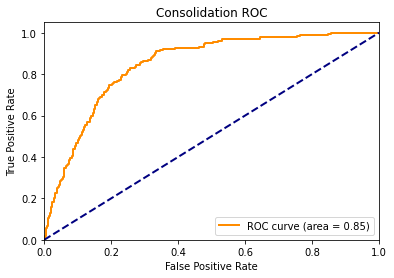

In [60]:
import pandas as pd# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_consol[:, 0], res_consol[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_consol.ravel(), res_consol.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Consolidation ROC')
plt.legend(loc="lower right")
plt.show()

### ground glass pattern

In [61]:
#res_covid = results['1'].values
#val_covid = validate['COVID19'].values

res_ggp = results['82'].values
val_ggp = validate['ground glass pattern'].values
res_ggp.shape = [10158 ,1]
val_ggp.shape = [10158 ,1]

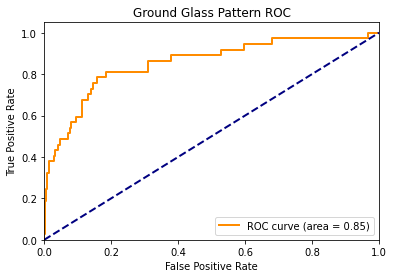

In [62]:
import pandas as pd# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_ggp[:, 0], res_ggp[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_ggp.ravel(), res_ggp.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ground Glass Pattern ROC')
plt.legend(loc="lower right")
plt.show()

### alveolar pattern

In [63]:
#res_covid = results['1'].values
#val_covid = validate['COVID19'].values

res_ap = results['11'].values
val_ap = validate['alveolar pattern'].values
res_ap.shape = [10158 ,1]
val_ap.shape = [10158 ,1]

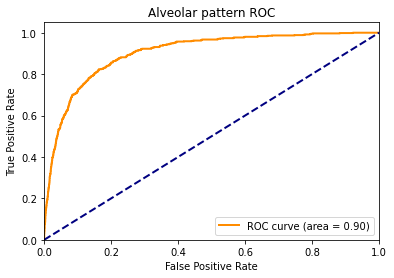

In [64]:
import pandas as pd# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_ap[:, 0], res_ap[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_ap.ravel(), res_ap.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Alveolar pattern ROC')
plt.legend(loc="lower right")
plt.show()

### ROC curves for mutilabel problems

In [65]:
#fpr["macro"].shape 
#tpr["macro"].shape
all_fpr.shape


(67943,)

In [66]:
predict_mine = np.where(res_ap[:, 0] > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix
confusion_matrix(val_ap[:, 0], predict_mine)

array([[8167, 1384],
       [ 126,  481]], dtype=int64)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
n_classes = 197


C:\Users\colmc\Anaconda3\envs\new_env\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.8021234868842095
0.959918334609355
0.8794682422451995
0.7088422642500656
0.9727813379799277
0.523020484538113
0.6462189838519101
0.6472513482025968
0.8024044146629878
0.7289668078400473
0.7924097678908104
0.9032627581368866
0.5783357951747907
0.819940471227363
0.7438953105446882
0.8570023629427216
0.8336452587339112
0.7744949222199381
0.8875026906794863
0.875916149220095
0.8872536366121049
nan
0.5652709359605911
0.7518466898954705
0.41119263344494783
0.8094858383499457
0.8912484881203897
0.7130204398900821
0.6597805155046416
0.6489120803386828
0.5577491138243402
0.7070612566476266
nan
0.7903708780903169
0.8631516948047873
0.8146774118576707
0.6958448662185317
0.675986262091429
0.6677910183179043
0.6876342413875117
0.6094319188736832
0.8493611858816393
0.8279745816757267
0.7258485010340057
0.864654669543232
0.9475113122171945
0.8137673026561916
0.861454533504223
0.951530964247467
0.9690498213775119
0.9482408457154871
0.9978468113083497
0.802027567029045
0.9179587201264072
0.7896403476

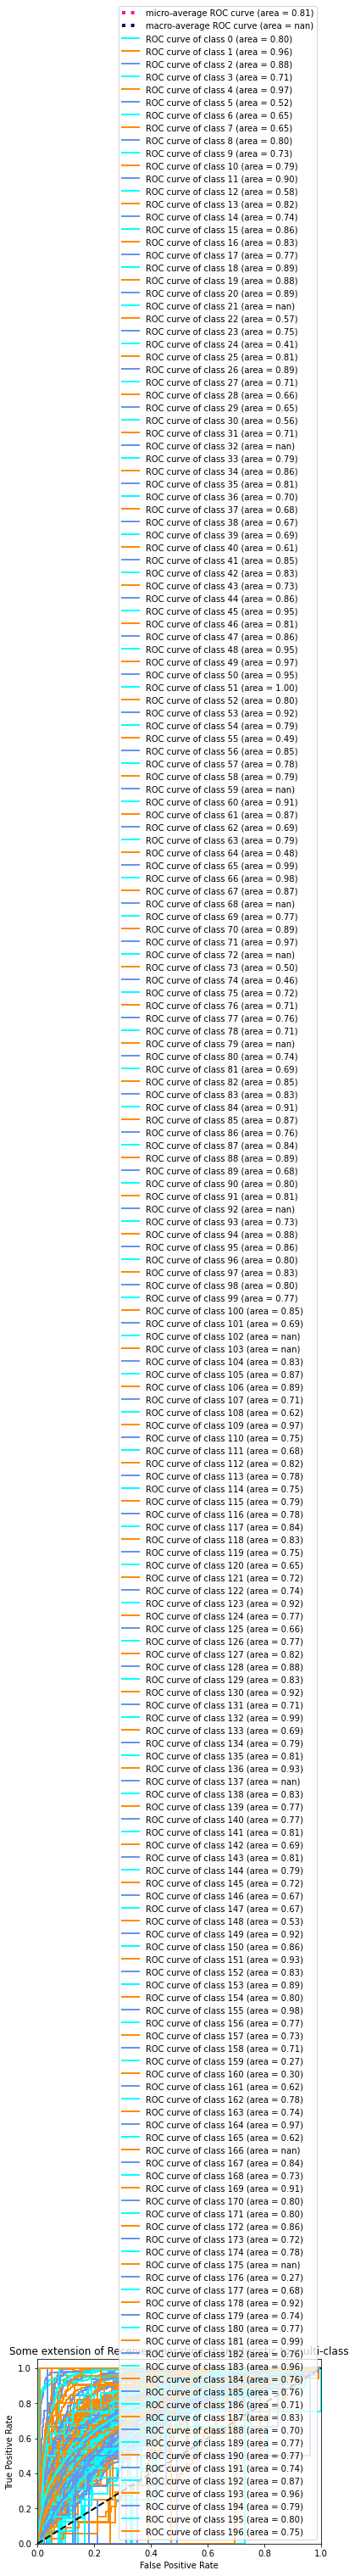

In [68]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val[:, i], res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val.ravel(), res.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
n_classes = 197
lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
#print(roc_auc["macro"])
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    print(roc_auc[i])
                

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()